# dataset

In [1]:
from google.colab import files
# Upload file
uploaded = files.upload()  # Akan muncul tombol upload

Saving IT Support Ticket Data.csv to IT Support Ticket Data.csv


In [2]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


# Load dataset

In [35]:
import pandas as pd

df = pd.read_csv('/content/IT Support Ticket Data.csv')
df.head(5)

,Unnamed: 0,Body,Department,Priority,Tags
0,0,"Dear Customer Support Team,I am writing to rep...",Technical Support,high,"['Account', 'Disruption', 'Outage', 'IT', 'Tec..."
1,1,"Dear Customer Support Team,I hope this message...",Returns and Exchanges,medium,"['Product', 'Feature', 'Tech Support']"
2,2,"Dear Customer Support Team,I hope this message...",Billing and Payments,low,"['Billing', 'Payment', 'Account', 'Documentati..."
3,3,"Dear Support Team,I hope this message reaches ...",Sales and Pre-Sales,medium,"['Product', 'Feature', 'Feedback', 'Tech Suppo..."
4,4,"Dear Customer Support,I hope this message reac...",Technical Support,high,"['Feature', 'Product', 'Documentation', 'Feedb..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29651 entries, 0 to 29650
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29651 non-null  int64 
 1   Body        29650 non-null  object
 2   Department  29651 non-null  object
 3   Priority    29651 non-null  object
 4   Tags        29651 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Unnamed: 0
count,29651.000000
mean,14825.000000
std,8559.650752
min,0.000000
25%,7412.500000
50%,14825.000000
75%,22237.500000
max,29650.000000


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Body,1
Department,0
Priority,0
Tags,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Body'] = df['Body'].fillna("")

In [9]:
drop_columns = [
    'Unnamed: 0',
    'Department',
    'Tags'
]

df = df.drop(columns=drop_columns)

In [10]:
# # menggabungkan 2 kolom penting yang berhubungan
# df['text'] = df['Ticket Subject'] + " " + df['Ticket Description']

# EDA

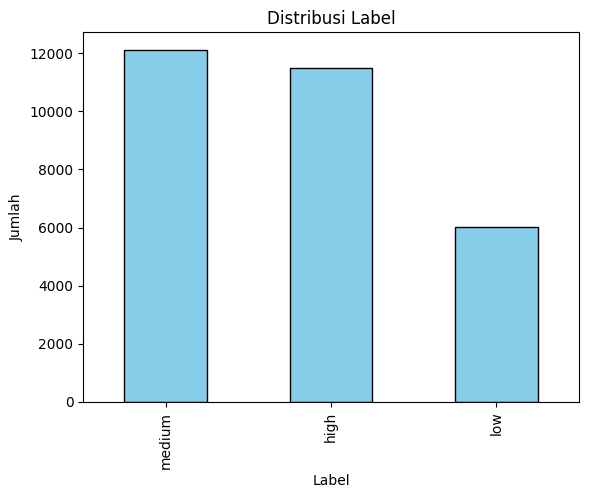

In [11]:
import matplotlib.pyplot as plt

# Membuat bar plot untuk distribusi label
label_distribution = df['Priority'].value_counts()

# Membuat plot
label_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.show()

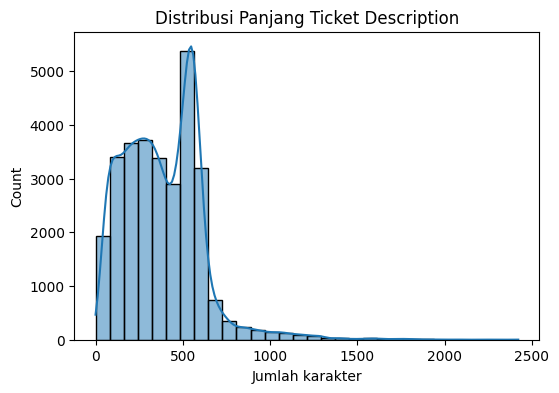

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# 4. Panjang teks Ticket Description
panjang_teks = df['Body'].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(panjang_teks, bins=30, kde=True)
plt.title("Distribusi Panjang Ticket Description")
plt.xlabel("Jumlah karakter")
plt.show()

In [13]:
# # 5. Panjang teks Ticket Subject
# panjang_tc_subject = df['Ticket Subject'].astype(str).apply(len)
# plt.figure(figsize=(6,4))
# sns.histplot(panjang_tc_subject, bins=30, kde=True, color='orange')
# plt.title("Distribusi Panjang Ticket Subject")
# plt.xlabel("Jumlah karakter")
# plt.show()

In [14]:
# from wordcloud import WordCloud

# subject_text = " ".join(df['Ticket Subject'].dropna())
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)
# plt.figure(figsize=(10,5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title("WordCloud Ticket Subject")
# plt.show()

# Preprocessing

In [15]:
import pandas as pd
import re

# Fungsi untuk menghapus URL, mentions, hashtag, tanda baca, dan angka
def clean_text(text):
    # Hapus tag HTML sederhana
    text = re.sub(r'<.*?>', '', text)
    # Menghapus hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    #lowercase
    text = text.lower()
    return text

# Terapkan pembersihan pada kolom 'tweet'
df['text_clean'] = df['Body'].apply(clean_text)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

X = df['text_clean']      # teks hasil preprocessing
y = df['Priority'] # label

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

maxlen = 350
# Padding supaya semua sequence punya panjang sama
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Hitung vocab size dari tokenizer
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

Vocab size: 9408


In [17]:
from sklearn.preprocessing import LabelEncoder
import json

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lihat mapping antara label asli dan numerik
label_map = {i: label for i, label in enumerate(le.classes_)}
print("Mapping Label Asli ke Angka:")
for i, label in label_map.items():
    print(f"{i} = {label}")

# Simpan mapping ke JSON
with open('label_map.json', 'w') as f:
    json.dump(label_map, f)

Mapping Label Asli ke Angka:
0 = high
1 = low
2 = medium


In [26]:
from sklearn.preprocessing import LabelEncoder
import pickle
import json
import os

MODEL_DIR = "Model_LSTM"   # ganti kalau perlu
os.makedirs(MODEL_DIR, exist_ok=True)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [29]:
with open(f"{MODEL_DIR}/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ label_encoder.pkl siap untuk Streamlit")

✅ label_encoder.pkl siap untuk Streamlit


In [18]:
from sklearn.model_selection import train_test_split
X = df['text_clean']
y = df['Priority']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    padded, y_encoded, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [32]:
from sklearn.preprocessing import LabelEncoder
import pickle

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🔥 SIMPAN INI
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Label encoder disimpan dengan kelas:", le.classes_)

Label encoder disimpan dengan kelas: ['high' 'low' 'medium']


In [19]:
# # Simpan CSV dengan teks asli
# train_df = pd.DataFrame({
#     'text': df.loc[X_train_idx, 'text_clean'],
#     'label': df.loc[X_train_idx, 'Ticket Priority']
# })
# train_df.to_csv("train.csv", index=False)

# val_df = pd.DataFrame({
#     'text': df.loc[X_val_idx, 'text_clean'],
#     'label': df.loc[X_val_idx, 'Ticket Priority']
# })
# val_df.to_csv("val.csv", index=False)

# test_df = pd.DataFrame({
#     'text': df.loc[X_test_idx, 'text_clean'],
#     'label': df.loc[X_test_idx, 'Ticket Priority']
# })
# test_df.to_csv("test.csv", index=False)

# Modelling

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

num_classes = len(le.classes_)

model = Sequential([
    Embedding(vocab_size, 128),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    # Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))


# 6. Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 985s 2s/step - accuracy: 0.3871 - loss: 1.1009 - val_accuracy: 0.4036 - val_loss: 1.0416
Epoch 2/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 904s 1s/step - accuracy: 0.5018 - loss: 0.9708 - val_accuracy: 0.5218 - val_loss: 0.9584
Epoch 3/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 893s 1s/step - accuracy: 0.5923 - loss: 0.8506 - val_accuracy: 0.5594 - val_loss: 0.9311
Epoch 4/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 955s 1s/step - accuracy: 0.6554 - loss: 0.7549 - val_accuracy: 0.5522 - val_loss: 0.9422
Epoch 5/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 957s 1s/step - accuracy: 0.7062 - loss: 0.6520 - val_accuracy: 0.5850 - val_loss: 0.9582
Epoch 6/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 955s 1s/step - accuracy: 0.7360 - loss: 0.5912 - val_accuracy: 0.5852 - val_loss: 1.0029
Epoch 7/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 970s 1s/step - accuracy: 0.7717 - loss: 0.5163 - val_accuracy: 0.6036 - val_loss: 0.9702
Epoch 8/10
649/649 ━━━━━━━━━━━━━━━━━━━━ 978s 1s/step - accuracy: 0.7971 - loss: 0.4586 - val_accu

In [21]:
model.save("lstm_model.h5")

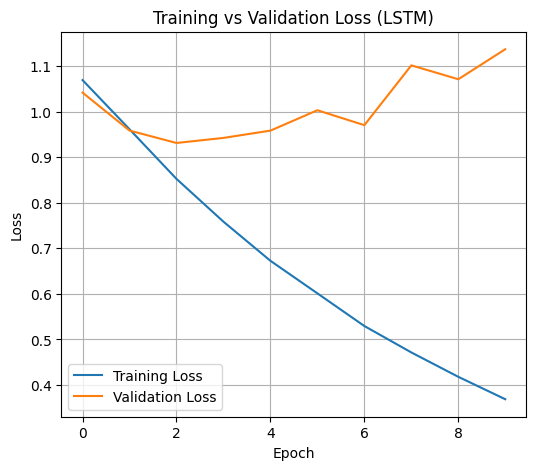

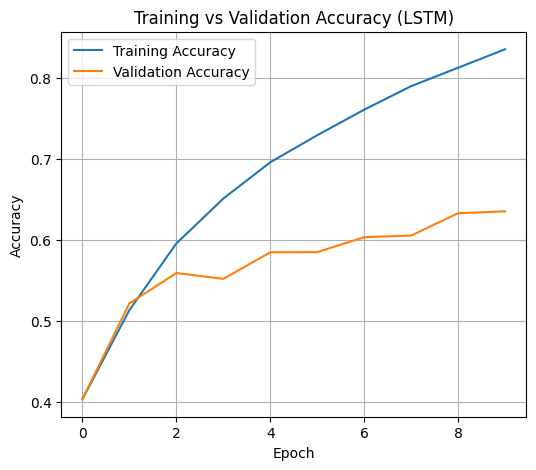

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

class_names = list(le.classes_)
# Classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 309ms/step
Classification Report:
               precision    recall  f1-score   support

        high       0.66      0.70      0.68      1689
         low       0.58      0.61      0.59       936
      medium       0.66      0.61      0.64      1823

    accuracy                           0.64      4448
   macro avg       0.64      0.64      0.64      4448
weighted avg       0.65      0.64      0.64      4448



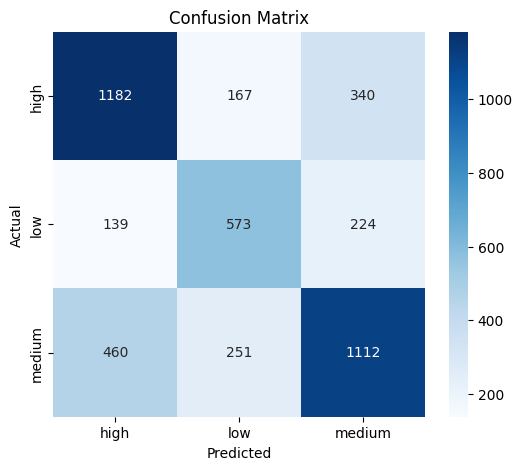

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_names = list(le.classes_)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [36]:
import os
import json
import pickle

MODEL_DIR = "Model_LSTM"
os.makedirs(MODEL_DIR, exist_ok=True)

In [37]:
model.save(f"{MODEL_DIR}/lstm_model.h5")
print("✅ Model LSTM disimpan")

✅ Model LSTM disimpan


In [38]:
with open(f"{MODEL_DIR}/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("✅ Tokenizer disimpan")

✅ Tokenizer disimpan


In [43]:
from sklearn.preprocessing import LabelEncoder

# y = label asli (Department)
le = LabelEncoder()
le.fit(y)  # PENTING: fit ke SELURUH DATA

with open(f"{MODEL_DIR}/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Label Encoder disimpan")
print("Jumlah kelas:", len(le.classes_))
print("Classes:", le.classes_)

✅ Label Encoder disimpan
Jumlah kelas: 3
Classes: ['high' 'low' 'medium']


In [40]:
config = {
    "max_length": padded.shape[1],
    "num_classes": len(le.classes_)
}

with open(f"{MODEL_DIR}/config.json", "w") as f:
    json.dump(config, f)

print("✅ Config disimpan")

✅ Config disimpan


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=128,
        input_length=350
    ),

    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64)),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(3, activation='softmax')  # 🔥 FIX UTAMA
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)